In [1]:
import numpy
import matplotlib.pyplot as plt

# It is necessary to formulate the hypotesis before looking at the data.
# NB. Here the prof robot is robot1 while mine robot is robot2.
# NB. The statistic used is the "mean time required to perform a loop."

print("With a level of significance of 5%, I formulate the following hypothesis:");
print("H0 : the mean time of Robot1 is the same as the mean time of Robot2.");
print("HA : the mean time of Robot1 is more than the mean time of Robot2.");

With a confidence level of 5%, I formulate the following hypothesis:
H0 : the mean time of Robot1 is the same as the mean time of Robot2.
HA : the mean time of Robot1 is more than the mean time of Robot2.


In [2]:
# These data are the time in seconds of the two robots (robot1 and robot2)
# took to perform a full lap of the circuit when the silver tokens were
# randomized in position and number.

x1 = [169.154610872, 160.50631094, 160.193871975, 162.73431015, 171.615926981, 146.42060113, 
      164.874943018, 166.398561001, 170.71450901, 152.080566883, 165.22359705, 180.650491953, 
      144.093259811, 150.78562808, 182.404114962, 182.045273066, 186.150043011, 140.57656312, 
      177.504603863, 144.070997, 187.539128065, 143.842684984, 142.717877865, 182.799865961, 
      175.961184025, 147.688951015, 169.607371092, 174.986310005, 137.404846907, 147.51603508];

x2 = [169.361819983, 150.805945158, 168.974892139, 151.178966045, 171.602332115, 169.894746065, 
         147.759425163, 161.36490202, 156.596208096, 130.017952919, 132.936256886, 160.277700901, 
         171.599838972, 181.357331038, 190.249431849, 115.228691101, 114.313158989, 183.150490046, 
         170.216054201, 172.882122993, 137.24959898, 127.425196886, 128.118843079, 137.255570889, 
         153.722115993, 161.541566849, 124.616447926, 127.156961918, 116.644661188, 147.857630968];

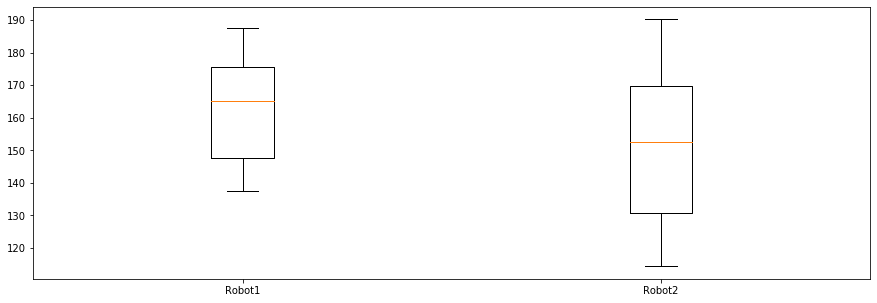

In [3]:
# Making BoxPlots to visualize graphically the data.
fig1, ax1= plt.subplots(1, figsize=(15, 5));
plt.subplots_adjust(wspace=0.5, hspace=None);
ax1.boxplot([x1, x2]);
ax1.set(xticks=[1,2], xticklabels=["Robot1", "Robot2"]);

In [8]:
# Since the values are not paired, the Two Sample T-Test is used.
# Computing the length of the two observation arrays.
N1 = len(x1);
N2 = len(x2);
# Computing the mean values for the velocities.
x1m = numpy.mean(x1);
x2m = numpy.mean(x2);
# Computing the standard deviation for the velocities.
std1 = numpy.std(x1);
std2 = numpy.std(x2);

# Computing the pooled standard deviation.
std_pooled_2 = ((N1-1)*std1*std1 + (N2-1)*std2*std2) / (N1+N2-2);
std_pooled = numpy.sqrt(std_pooled_2 * (1/N1 + 1/N2));

# Computing the t_statistics for the Two sample T-Test.
t_statistics = (x1m - x2m) / std_pooled;

In [9]:
# Given the current formulation of the hypothesis, we are considering only
# one of the two tails to reject the hypotesis H0. So, we must use the table
# related to the one-sided T-Test.

print("We have DoF="+str(N1)+"+"+str(N2)+"-2="+str(N1+N2-2)+", reporting the column:");
print("One-sided |  75%  |  80%  |  85%  |  90%  |  95%  | 97.5% |  99%  | 99.5% | 99.75%| 99.9% | 99.95 |");
print("DoF=60    | 0.679 | 0.848 | 1.045 | 1.296 | 1.671 | 2.000 | 2.390 | 2.660 | 2.915 | 3.232 | 3.460 |");
print("");

# The reference value for a confidence level of 95% and DoF=60 is:
ref = 1.671;

if t_statistics > ref :
    # Rejecting the null hypothesis
    print("Therefore, with a confidence level of 95% (with an error of 5%),");
    print("Given the fact that t_statistics = "+str(t_statistics)+" > "+str(ref)+",");
    print("We can reject the null hypothesis H0 and accept the alternative hypothesis HA.");
else:
    # Not rejecting the null hypothesis
    print("Given the fact that t_statistics = "+str(t_statistics)+" <= "+str(ref)+",");
    print("We cannot reject the null hypothesis H0.");

We have DoF=30+30-2=58, reporting the column:
One-sided |  75%  |  80%  |  85%  |  90%  |  95%  | 97.5% |  99%  | 99.5% | 99.75%| 99.9% | 99.95 |
DoF=60    | 0.679 | 0.848 | 1.045 | 1.296 | 1.671 | 2.000 | 2.390 | 2.660 | 2.915 | 3.232 | 3.460 |

Therefore, with a confidence level of 5%,
Given the fact that t_statistics = 2.4693785060866476 > 1.671,
We can reject the null hypothesis H0 and accept the alternative hypothesis HA.
